# 数据探索

## 数据分析 

### 描述性分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

In [2]:
train=pd.read_csv('train.csv')
tmp=train.pop('sale_quantity')
train['sale_quantity']=tmp # 给标签放到最后一列去
train

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sale_date,class_id,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,...,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,sale_quantity
0,201609,289403,12,2,1,1,1,6,MT,1.8,...,4440,1833,1545,1695,1320,5,2700,1556,1562,94
1,201609,745137,637,3,2,1,2,6,DCT,1.6,...,4534,1823,1483,1711,1336,5,2648,1553,1544,435
2,201609,714860,831,3,2,2,3,6,AT,1.8,...,4720,1815,1465,1860,1459,5,2770,1579,1589,180
3,201609,175962,750,3,2,1,4,6,AT,1.6,...,4475,1706,1469,1625,1145,5,2603,1460,1500,40
4,201609,270690,98,2,3,3,1,5,MT,1.5,...,4415,1685,1850,1825,1236,5,2720,1420,1440,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20152,201607,810398,750,2,2,1,4,5,MT,1.6,...,4282,1706,1475,1600,1120,5,2603,1460,1500,10
20153,201607,175962,750,3,2,1,4,6,AT,1.6,...,4473,1706,1469,1635,1155,5,2603,1460,1500,126
20154,201607,395234,841,3,2,2,6,6,AT,2.0,...,4805,1860,1458,2065,1580,5,2815,1584,1551,9
20155,201608,587678,537,2,1,3,5,0,CVT,1.8,...,4294,1772,1605,1770,1302,5,2610,1535,1540,194


In [3]:
explore=train.describe(include='all').T
explore['null']=len(train)-explore['count']
explore.insert(0,'dtype',train.dtypes) 
explore.to_csv('explore.csv')

In [4]:
explore

,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null
sale_date,int64,20157.0,NaN,NaN,NaN,201490.186784,157.488965,201201.0,201402.0,201506.0,201609.0,201710.0,0.0
class_id,int64,20157.0,NaN,NaN,NaN,507410.234906,234920.469728,103507.0,304458.0,472603.0,692703.0,978089.0,0.0
brand_id,int64,20157.0,NaN,NaN,NaN,643.293645,250.153093,12.0,537.0,750.0,814.0,985.0,0.0
compartment,int64,20157.0,NaN,NaN,NaN,2.518033,0.528447,1.0,2.0,3.0,3.0,3.0,0.0
type_id,int64,20157.0,NaN,NaN,NaN,1.860297,0.608067,1.0,2.0,2.0,2.0,4.0,0.0
level_id,object,20157,6,1,10619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
department_id,int64,20157.0,NaN,NaN,NaN,3.348316,1.55257,1.0,2.0,4.0,4.0,7.0,0.0
TR,object,20157,10,6,7640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
gearbox_type,object,20157,7,AT,8421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
displacement,float64,20157.0,NaN,NaN,NaN,1.728129,0.345978,0.0,1.5,1.6,2.0,3.6,0.0


所有数据没有直接明显的缺失 NaN  
观察到有为 0 的值，有可能是缺失，接下来需要进一步分析  
观察到有为 '-' 的值，显然是缺失，要进一步分析、填充

### 相关性分析 

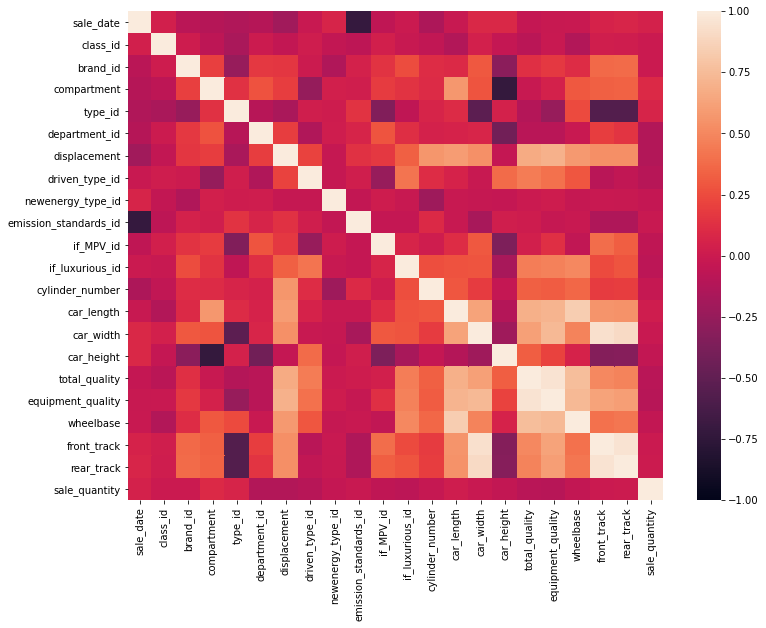

In [5]:
corrmat=train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmin=-1.0)
plt.show()

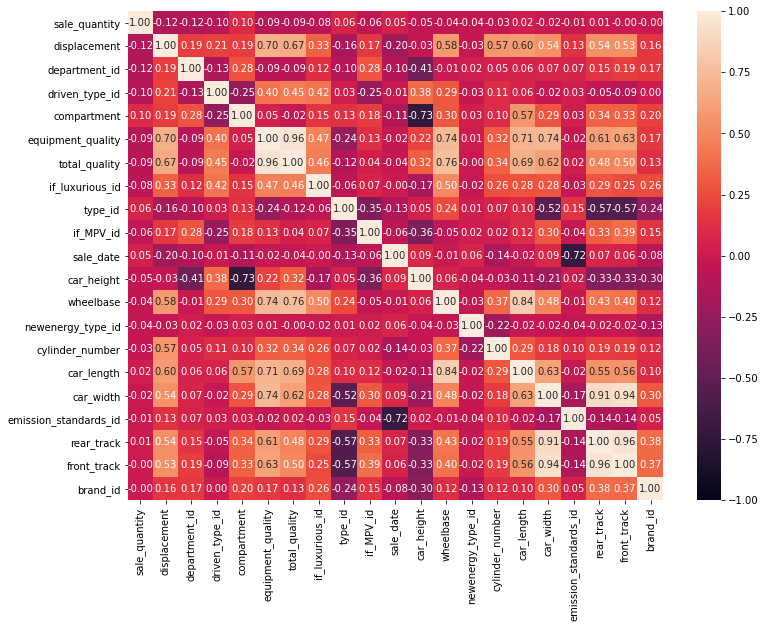

In [6]:
corrmat_tmp=corrmat.copy()
corrmat_tmp['sale_quantity']=abs(corrmat_tmp['sale_quantity'])
cols=corrmat_tmp.nlargest(21,'sale_quantity')['sale_quantity'].index
plt.figure(figsize=(12,9))
sns.heatmap(train[cols].corr(),vmin=-1.0,annot=True,fmt='.2f')
plt.show()

可以看到所有特征和销量的相关性都挺差的  
然后通过这个相关性矩阵热图也可以看到一些特征之间有着很强的相关性  
再结合特征的含义  
在我们处理缺失值时，可以利用这些相关性进行分组填充  

### 分布分析 

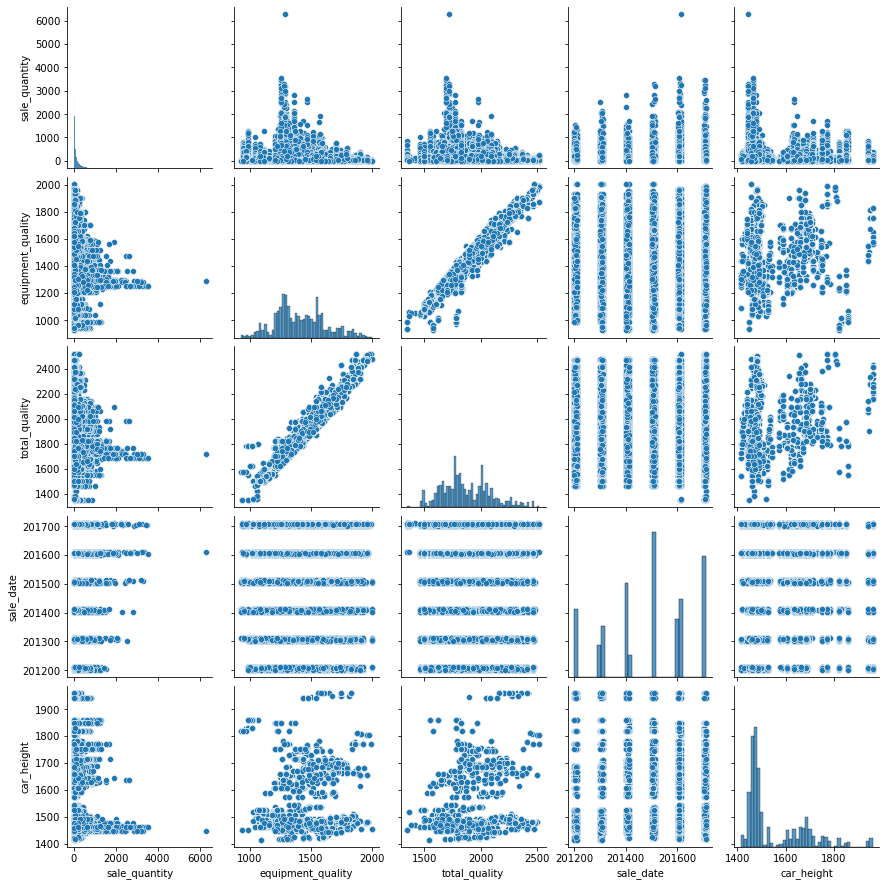

In [7]:
cols=['sale_quantity', 'equipment_quality','total_quality','sale_date','car_height']
sns.pairplot(train[cols],height=2.5)
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


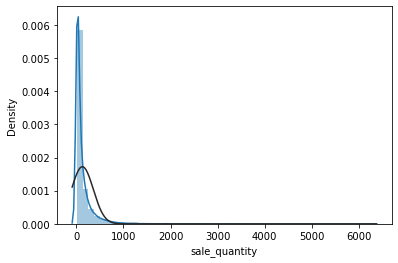

In [8]:
sns.distplot(train['sale_quantity'],fit=norm)
plt.show()

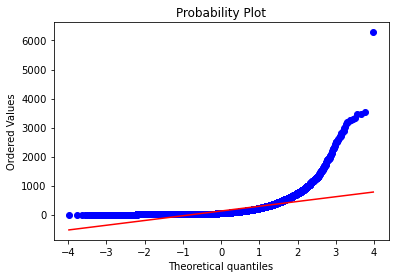

In [9]:
stats.probplot(train['sale_quantity'],plot=plt)# QQ图，截距均值，斜率标准差
plt.show()

In [10]:
train['sale_quantity'].skew() #偏度，右偏

6.106668594096458

In [11]:
train['sale_quantity'].kurt() #峰度，太尖

69.18590888015842

通过pairplot的几个图像我们可以大致发现，这些特征都不是正态分布，其他特征也都差不多，不再进一步验证了  
对于这些特征可以直接用 boxcox1p 平滑  
然后对于标签  
可以看到偏度很大，峰度特别大，明显不是正态分布  
由于是右偏，可以用log1p平滑，最后结果再用expm1转换回来  

sale_date
201201    22927
201202    14433
201203    15587
201204    13438
201205    18195
          ...  
201706    47246
201707    52499
201708    48173
201709    56568
201710    50076
Name: sale_quantity, Length: 70, dtype: int64


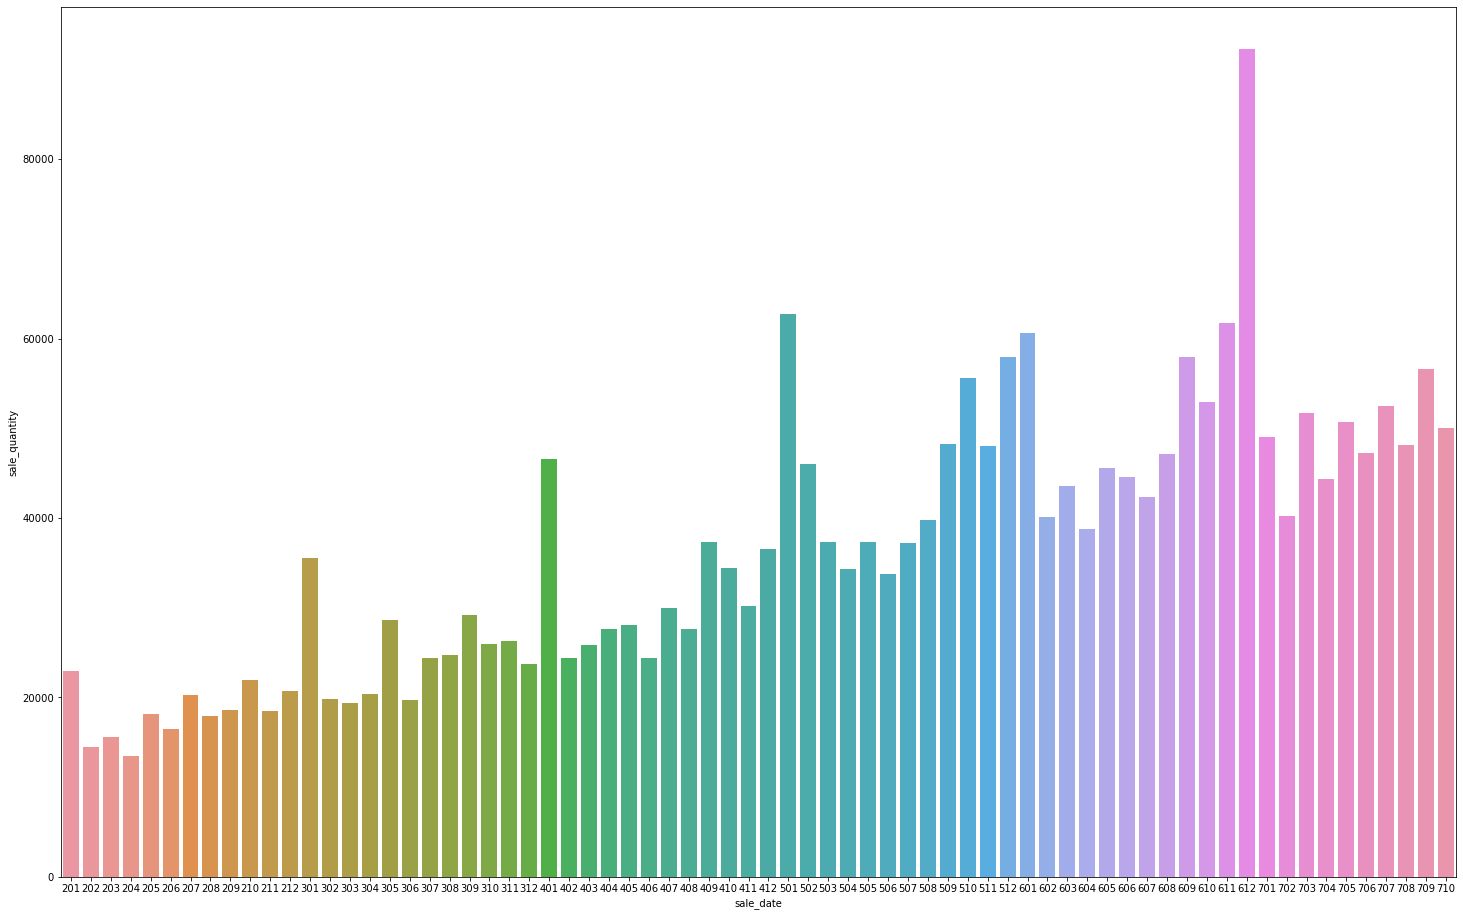

In [12]:
# 查看不同月份的汽车的销售总量
quantity_sum=train.groupby('sale_date')['sale_quantity'].sum()
print(quantity_sum)
data_group=pd.DataFrame({'sale_date':quantity_sum.index.tolist(),'sale_quantity':quantity_sum.values.tolist()})
data_group['sale_date']=data_group['sale_date']%1000
plt.figure(figsize=(25,16))
sns.barplot(x='sale_date',y='sale_quantity',data=data_group)
plt.show()

通过条形图我们首先可以看到，一般每年1月过年前后买车特别多  
但是有一个特例，就是2016年的12月特别多，2017年1月并没那么多  
通过百度搜索，发现是政策原因。https://www.sohu.com/a/121810868_390501  
201612和201701是明显异常的，我们考虑利用车的特征进行训练预测重新填充这两个月的销量数据  
对于最终测试需要的201711和201712的预测  
我们考虑拆分出所有 年月的销量 做特征，对应 年月 没销量就是0，代码上就是getdummies onehot编码，然后把==1的用sale_quantity给赋了  
然后按 车id+所有配置 分组，用 sum 聚合，把需要预测的月的过去年对应的这个月的历史销量作标签进行训练，其他历史销量正常作特征  
然后特征加上与标签相对应的 pred_year、pred_month
考虑到是预测201710以后的两个月，特征里还可以进一步加入一阶差分和二阶差分等新特征  
对于预测后的值直接按 车id 分组 sum 聚合 就是最终结果了  

### 缺失值分析

In [13]:
(train['displacement']==0).sum() # displacement 排量为0数

19

In [14]:
(train['cylinder_number']==0).sum() # cylinder_number 缸数为0数

19

In [15]:
(train['engine_torque']=='-').sum() # engine_torque 发动机扭矩缺失数

19

In [16]:
((train['displacement']==0)&(train['cylinder_number']==0)&(train['engine_torque']=='-')
 &(train['newenergy_type_id']==3)&(train['fuel_type_id']==4)).sum()

19

新能源类型 3，用的是纯电动燃料 4，有电动机，没发动机，所以没有发动机扭矩，是横杠。不需要内燃机，所以缸数为0，不烧油，排量为0  
由于发动机扭矩有数值特性，不是标称量  
所以最好把横杠填充为0  

In [17]:
(train['level_id']=='-').sum() # level_id 车型级别缺失数

298

通过查阅资料，发现 车型级别 只和 轴距、车长、排量有关  
考虑用 svm 拟合来预测，填充缺失的车型级别

In [18]:
(train['TR']=='0').sum() # level_id 变速器档位数为0数

2415

变速器档位 TR 明显与变速器形式 gearbox_type 直接相关  
gearbox_type 无缺失，考虑按 gearbox_type 分组，填充众数mode，如果存在多个众数，则保留故意缺失，onehot后去掉缺失类别

In [19]:
train.loc[train['TR']=='0',:].groupby('gearbox_type')['TR'].count()

gearbox_type
CVT    2415
Name: TR, dtype: int64

但是发现所有 档位为0 的都是 CVT 变速器  
查阅资料发现 CVT 无级变速不存在确定的档位数，所以用'0'表示了  
于是这部分不是缺失，是单纯的没有无极变速档位数这个说法，之后直接onehot就行，无需填充  

In [20]:
(train['price']=='-').sum() # price 价格缺失数

8780

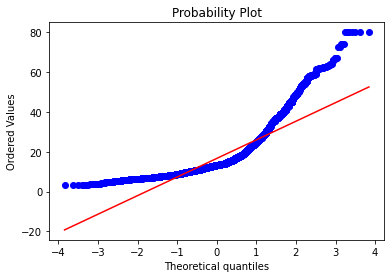

In [21]:
# 查看价格是否符合正态分布
stats.probplot(train['price'].drop(train.loc[train['price']=='-',:].index).astype(np.float64),plot=plt)
plt.show()

与价格最相关的特征是成交段 price_level，但是浮动范围还是略有点大  
实际上其他特征都和价格有一定的相关性，可以考虑通过预测来填充缺失值，不过没必要    
严重不符合正态分布，所以不用平均值，我们决定按成交段分组，用中位数填充  

In [22]:
(train['fuel_type_id']=='-').sum() # fuel_type_id 燃料种类缺失数

3

In [23]:
train.loc[train['fuel_type_id']=='-',['sale_quantity','fuel_type_id','power','engine_torque']]

,sale_quantity,fuel_type_id,power,engine_torque
17932,8,-,81/70,155/140
18554,32,-,81/70,155/140
18600,5,-,81/70,155/140


发现这三个缺失值对应的数据恰好就是power和engine_torque多值的数据  
在百度查询相关信息  
我们发现一辆车不可能有两个发动机  
也就不会有两个发动机扭矩和两个功率  
而且这几条数据的销量不多，所以我们考虑直接删掉这三行数据  

### 异常值分析 

<AxesSubplot:xlabel='sale_date', ylabel='sale_quantity'>

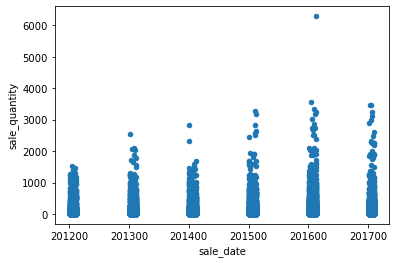

In [24]:
train.plot.scatter(x='sale_date',y='sale_quantity')

In [25]:
train[train['sale_quantity']>6000]

,sale_date,class_id,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,...,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,sale_quantity
1583,201612,347384,831,3,2,1,3,6,AT,1.6,...,4600,1780,1445,1720,1290,5,2700,1555,1568,6284


可以看到>6000的那个点比较异常  
最好填充成别的  
发现这条数据在我们本来就想重新填充的201612的数据里，那正好

<AxesSubplot:xlabel='department_id', ylabel='sale_quantity'>

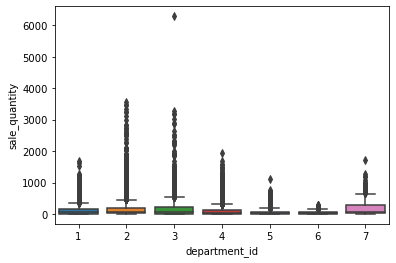

In [26]:
sns.boxplot(x='department_id',y="sale_quantity",data=train)

本来想通过箱线图看一下异常值  
但是箱线图来看全是异常  
但想来也正常，数据分布的那么烂，肯定会这样  
没啥参考意义，就不进一步分析了  

### 冗余值分析 

In [27]:
train[train.duplicated()==True]

,sale_date,class_id,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,...,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,sale_quantity


很好，没有冗余值，实际上有的话也就顶多求和聚合一下，不合并也差别不大  

### 其他探索性分析

In [28]:
flag=[not s.isdigit() for s in train['rated_passenger'].values]
print(sum(flag))
train.loc[flag,'rated_passenger'].sample(5)

1243


11358    7-8
11348    6-7
2640     7-8
827      7-8
3963     7-8
Name: rated_passenger, dtype: object

发现载客数有范围型的  
载客数这里虽然是标称量，但实际上也有一定数值特性  
做onehot的同时最好也保留原来的数值特性  
范围型载客数发现都是差1人  
考虑直接平均数 0.5

In [29]:
flag1=[s.find(';')!=-1 for s in train['TR'].values]
flag2=[s.find(';')!=-1 for s in train['gearbox_type'].values]
flag=np.array(flag1)&np.array(flag2)
print(sum(flag1),sum(flag2),flag.sum())
train.loc[flag,['TR','gearbox_type']].sample(5)

42 42 42


,TR,gearbox_type
14621,8;7,AT;DCT
16107,8;7,AT;DCT
15280,5;4,MT;AT
15481,5;4,MT;AT
10727,5;4,MT;AT


发现有变速器类型和档位一一对应的多值数据  
研究发现是 手自一体  
所以问题不大，保持现状，之后无脑onehot即可

## 数据清洗

### 直接删除的

fuel_type_id 缺失的 3条  

In [30]:
train=train.drop(train[train['fuel_type_id']=='-'].index)
train.shape

(20154, 32)

### 缺失值填充

engine_toque: 0

In [31]:
(train['engine_torque']=='-').sum()

19

In [32]:
train.loc[train['engine_torque']=='-','engine_torque']=0
(train['engine_torque']=='-').sum()

0

level_id：svm [displacement,wheelbase,car_length] -> level_id

In [33]:
(train['level_id']=='-').sum()

298

In [34]:
X_t=train.loc[train['level_id']!='-',['displacement','wheelbase','car_length']].values
y_t=train.loc[train['level_id']!='-','level_id'].values
X_na=train.loc[train['level_id']=='-',['displacement','wheelbase','car_length']].values
print(X_t.shape,y_t.shape,X_na.shape)

(19856, 3) (19856,) (298, 3)


In [35]:
from sklearn.svm import SVC
svm=SVC(C=100, gamma=0.0001, kernel='rbf')
svm.fit(X_t,y_t)
y_pred=svm.predict(X_na)
X_na=train.loc[train['level_id']=='-','level_id']=y_pred
(train['level_id']=='-').sum()

0

price: groupby price_level, price.median -> price

In [36]:
(train['price']=='-').sum()

8780

In [37]:
# 顺便转换成 float
train.loc[train['price']=='-','price']=np.nan
train['price']=train['price'].astype(np.float64)
train['price']=train.groupby('price_level')['price'].transform(lambda x:x.fillna(x.median()))
train['price'].isna().sum()

0

'reted_passenger': mean

In [38]:
flag=[not s.isdigit() for s in train['rated_passenger'].values]
sum(flag)

1243

In [39]:
ind=train.loc[flag,:].index
for i in ind:
    s=train['rated_passenger'][i]
    train['rated_passenger'][i]=(float(s[0])+float(s[2]))/2
train['rated_passenger']=train['rated_passenger'].astype(np.float64) # 顺便转成float

<ipython-input-39-abf484a15c5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rated_passenger'][i]=(float(s[0])+float(s[2]))/2


### 数据类型转换

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20154 entries, 0 to 20156
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sale_date              20154 non-null  int64  
 1   class_id               20154 non-null  int64  
 2   brand_id               20154 non-null  int64  
 3   compartment            20154 non-null  int64  
 4   type_id                20154 non-null  int64  
 5   level_id               20154 non-null  object 
 6   department_id          20154 non-null  int64  
 7   TR                     20154 non-null  object 
 8   gearbox_type           20154 non-null  object 
 9   displacement           20154 non-null  float64
 10  if_charging            20154 non-null  object 
 11  price_level            20154 non-null  object 
 12  price                  20154 non-null  float64
 13  driven_type_id         20154 non-null  int64  
 14  fuel_type_id           20154 non-null  object 
 15  ne

fuel_type_id 有int和str混合的情况，转为int  
power 有数值特性，不是标称，应该转为float  
engine_torque 有数值特性，不是标称，应转为float  
剩下字符串型标称量可以直接onehot，暂时不做处理  

In [41]:
train['fuel_type_id']=train['fuel_type_id'].astype(np.int64)
train['power']=train['power'].astype(np.float64)
train['engine_torque']=train['engine_torque'].astype(np.float64)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20154 entries, 0 to 20156
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sale_date              20154 non-null  int64  
 1   class_id               20154 non-null  int64  
 2   brand_id               20154 non-null  int64  
 3   compartment            20154 non-null  int64  
 4   type_id                20154 non-null  int64  
 5   level_id               20154 non-null  object 
 6   department_id          20154 non-null  int64  
 7   TR                     20154 non-null  object 
 8   gearbox_type           20154 non-null  object 
 9   displacement           20154 non-null  float64
 10  if_charging            20154 non-null  object 
 11  price_level            20154 non-null  object 
 12  price                  20154 non-null  float64
 13  driven_type_id         20154 non-null  int64  
 14  fuel_type_id           20154 non-null  int64  
 15  ne

保存清洗后的train为csv

In [42]:
train.index=range(len(train))
train.to_csv('train_clean.csv')